In [5]:
import pandas as pd 
import numpy as np 
np.random.seed(42)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
df_train=pd.read_csv("Train_Clean.csv")
df_test=pd.read_csv("Test_Clean.csv")
df_train


,anger,disgust,fear,sadness,surprise,happiness,neutral,Sentences,word_count,char_count,word_density
0,0,0,0,1,1,0,0,محبت پردے میں نفرت کرنےوالو,5,23,0.208333
1,0,0,0,0,0,1,0,حامد میر خوشی اس کا ذمہ دار حکومت خوش,9,29,0.300000
2,0,0,0,0,0,0,1,اس نئے سال شام سپاہی قاتل لارنس شکل میں شعبے ب...,135,526,0.256167
3,0,0,0,0,0,0,1,کچھ اس طرح سے فلم جا سکتے لیکن میں سب سے یقینا...,117,435,0.268349
4,0,0,0,0,0,0,1,رون ہاورڈ اس ایڈیٹرز صرف اتنا کرنا جس کا تھا ا...,84,304,0.275410
...,...,...,...,...,...,...,...,...,...,...,...
7795,0,0,0,0,0,0,1,آپ کس طرح نوجوان برطانوی اداکار اس قابل احترام...,72,275,0.260870
7796,0,0,0,0,0,0,1,میں نے امریکہ کنفیڈریشن امریکہ میں ورجینیا سے ...,106,382,0.276762
7797,0,0,0,0,0,1,0,سورۃ نمبر النساء آیت نمبر جب تم سفر جا تم نماز...,19,65,0.287879
7798,0,0,1,0,0,0,0,رونا نہیں حالات خراب اوراس بیماری نے انہیں مخد...,19,75,0.250000


### All the sentences in the above dataframe are already cleaned in the EDA step. 

In [9]:
#splitting the dataset into train and test with ratio of 80:20
x_train,x_test,y_train,y_test=train_test_split(df_train["Sentences"],df_train[["anger","disgust","fear","sadness","surprise","happiness","neutral"]],test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6240,), (1560,), (6240, 7), (1560, 7))

In [11]:
#vectorizing the urdu statements using the Term frequency and inverse document frequency
max_feature_num = 50000
vectorizer = TfidfVectorizer(max_features=max_feature_num)
train_vecs = vectorizer.fit_transform(x_train)
test_vecs = TfidfVectorizer(max_features=max_feature_num, vocabulary=vectorizer.vocabulary_).fit_transform(x_test)
# visualizing the shape of train and test vecs
train_vecs.shape,test_vecs.shape


((6240, 18254), (1560, 18254))

In [12]:
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [121]:
#transforming problem using the labelpowerset technique

from sklearn.metrics import accuracy_score
def build_model(model,mlb_estimator,xtrain,ytrain,xtest,ytest):
    clf = mlb_estimator(model)
    clf.fit(xtrain,ytrain)
    clf_predictions = clf.predict(xtest)
    acc = accuracy_score(ytest,clf_predictions)
    f_1_score = f1_score(ytest,clf_predictions,average="weighted")
    result = {"accuracy:":acc,"f1_score":f_1_score}
    return result

In [122]:
#creating a model based on Multinomial Naive Bayes
clf_model_1=build_model(MultinomialNB(),LabelPowerset,train_vecs,y_train,test_vecs,y_test)
#results
clf_model_1

{'accuracy:': 0.4756410256410256, 'f1_score': 0.33113488536862495}

In [75]:
#building the model based on Gaussian Nave Bayes
clf_model_2=build_model(GaussianNB(),LabelPowerset,train_vecs,y_train,test_vecs,y_test)
clf_model_2

{'accuracy:': 0.5211538461538462, 'f1_score': 0.5472912772879525}

In [76]:
from sklearn.svm import LinearSVC 
#building svm classifier
clf_model_3=build_model(LinearSVC(),LabelPowerset,train_vecs,y_train,test_vecs,y_test)
#getting results 
clf_model_3

{'accuracy:': 0.6115384615384616, 'f1_score': 0.7029354772018196}

In [77]:
#implementing KNN 
from sklearn.neighbors import KNeighborsClassifier
clf_model_4=build_model(KNeighborsClassifier(),LabelPowerset,train_vecs,y_train,test_vecs,y_test)
clf_model_4

{'accuracy:': 0.5775641025641025, 'f1_score': 0.6548274383232633}

In [78]:
#implementing KMeans algorithm
from sklearn.cluster import KMeans 
clf_model_5=build_model(KMeans(),LabelPowerset,train_vecs,y_train,test_vecs,y_test)
clf_model_5

{'accuracy:': 0.01217948717948718, 'f1_score': 0.08810112188449355}

In [79]:
#implementing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier as DTC
clf_model_6=build_model(DTC(),LabelPowerset,train_vecs,y_train,test_vecs,y_test)
clf_model_6

{'accuracy:': 0.5557692307692308, 'f1_score': 0.6393204670044063}

In [80]:
#implementing adaboost classifier 
from sklearn.ensemble import AdaBoostClassifier as ABC
clf_model_7=build_model(ABC(),LabelPowerset,train_vecs,y_train,test_vecs,y_test)
clf_model_7

{'accuracy:': 0.4724358974358974, 'f1_score': 0.4232897864481692}

In [81]:
#implementing random forest classifier 
from sklearn.ensemble import RandomForestClassifier as RFC
clf_model_8=build_model(RFC(),LabelPowerset,train_vecs,y_train,test_vecs,y_test)
clf_model_8

{'accuracy:': 0.6185897435897436, 'f1_score': 0.6751336244910666}

### Plotting the accuracy and f1_score of each model we have tested 

In [138]:
models=[clf_model_1,clf_model_2,clf_model_3,clf_model_4,clf_model_5,clf_model_6,clf_model_7,clf_model_8]
accuracy=[]
f1=[]
for j in models:
#     names.append("model_{j}")
    accuracy.append(j["accuracy:"]*100)
    f1.append(j["f1_score"]*100)
accuracy,f1

([47.56410256410256,
  52.11538461538462,
  61.15384615384616,
  57.75641025641025,
  1.217948717948718,
  55.57692307692308,
  47.243589743589745,
  61.858974358974365],
 [33.1134885368625,
  54.72912772879525,
  70.29354772018196,
  65.48274383232634,
  8.810112188449356,
  63.93204670044062,
  42.32897864481692,
  67.51336244910667])

In [84]:
import matplotlib.pyplot as plt 
%matplotlib inline
names=["MNB","GNB","SVM","KNN","KMeans","DTree","AdaBoost","RF"]

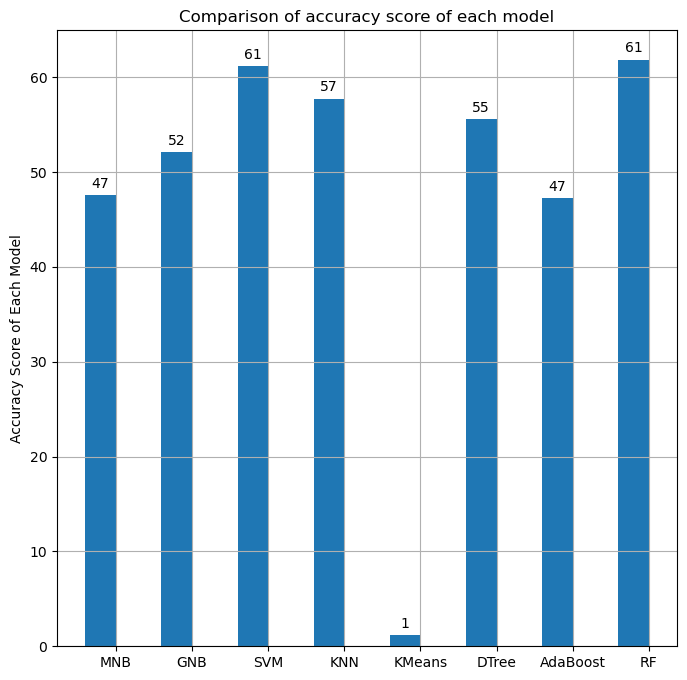

In [91]:
x = np.arange(8) # the label locations
width =0.4

fig, ax = plt.subplots(figsize=(8,8))

ax.set_ylabel('Accuracy Score of Each Model')
ax.set_title('Comparison of accuracy score of each model')
ax.set_xticks(x)
ax.set_xticklabels(names)

pps = ax.bar(x - width/2, accuracy, width)
for p in pps:
   height = p.get_height()
   ax.annotate('{}'.format(int(height)),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
plt.grid(True)
plt.savefig("Comparison_of_ML_Model_ACC.jpg",bbox_inches="tight")
plt.show()

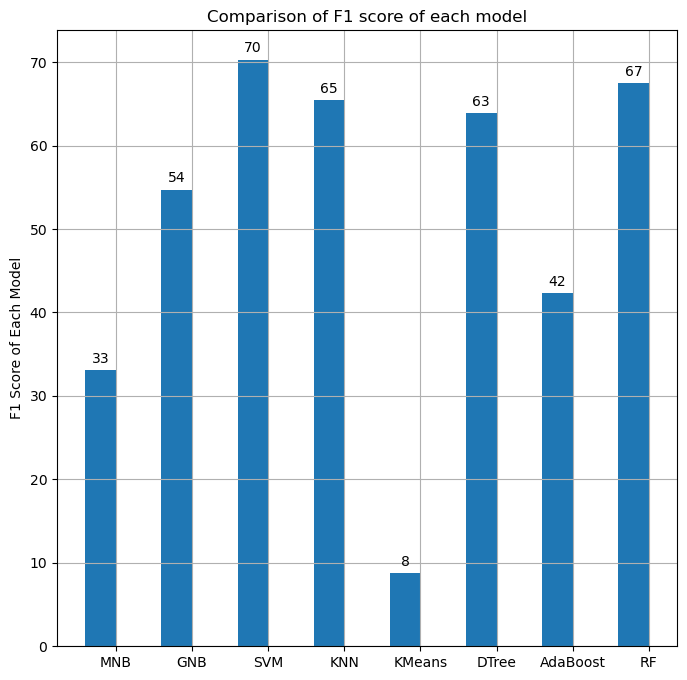

In [92]:
x = np.arange(8) # the label locations
width =0.4

fig, ax = plt.subplots(figsize=(8,8))

ax.set_ylabel('F1 Score of Each Model')
ax.set_title('Comparison of F1 score of each model')
ax.set_xticks(x)
ax.set_xticklabels(names)

pps = ax.bar(x - width/2, f1, width)
for p in pps:
   height = p.get_height()
   ax.annotate('{}'.format(int(height)),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
plt.grid(True)
plt.savefig("Comparison_of_ML_Model_F1.jpg",bbox_inches="tight")
plt.show()

### After Seelcting the top 5 models based on accuracy we will be finding the best hyperparameters for the model and selecting the best one.

## Using GridSearch CV to find the best models 

### The top 5 models are : [GaussianNB, Support Vector Machine, K-Nearest Neighbors, Decission Tree, and Random Forest]. Since it is not able to perform an exhaustive search over the GaussainNB classifier we ould be seelcting the 6th best model that turns out to be AdaBoost. Hence, the new list of top models are
### [Support Vector Machine, K-Nearest Neighbors, Decision Tree, Random Forest, AdaBoost Classifier].

In [133]:
#on test data set 
#vectorizing the urdu statements using the Term frequency and inverse document frequency
max_feature_num = 50000
vectorizer = TfidfVectorizer(max_features=max_feature_num)
train_vecs = vectorizer.fit_transform(df_train["Sentences"])
test_vecs = TfidfVectorizer(max_features=max_feature_num, vocabulary=vectorizer.vocabulary_).fit_transform(df_test["Sentences"])
# visualizing the shape of train and test vecs
train_vecs.shape,test_vecs.shape


((7800, 20084), (1950, 20084))

In [136]:
train_y=df_train[["anger","disgust","fear","sadness","surprise","happiness","neutral"]]
test_y=df_test[["anger","disgust","fear","sadness","surprise","happiness","neutral"]]

In [137]:
best_clf=build_model(LinearSVC(),LabelPowerset,train_vecs,train_y,test_vecs,test_y)
best_clf

{'accuracy:': 0.6102564102564103, 'f1_score': 0.7083665519191673}